In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils


Saving pexels-eberhardgross-1624255.jpg to pexels-eberhardgross-1624255.jpg


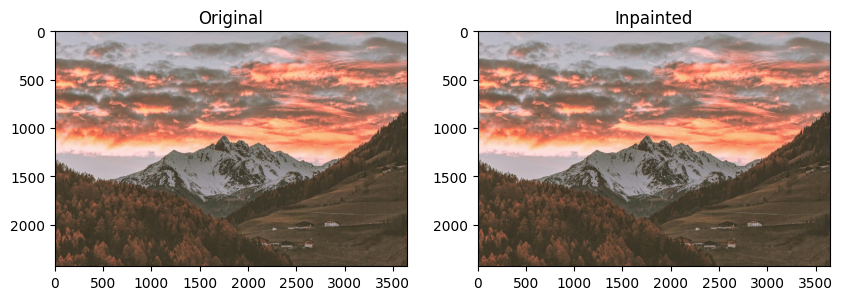

In [ ]:
# Upload image with noise
from google.colab import files
uploaded = files.upload()

for filename in uploaded.keys():
    img = cv2.imread(filename)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, mask = cv2.threshold(gray, 245, 255, cv2.THRESH_BINARY)

    inpainted = cv2.inpaint(img, mask, 3, cv2.INPAINT_TELEA)

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1); plt.title('Original'); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.subplot(1,2,2); plt.title('Inpainted'); plt.imshow(cv2.cvtColor(inpainted, cv2.COLOR_BGR2RGB))
    plt.show()


Saving l.png to l (1).png
Saving r.png to r (1).png


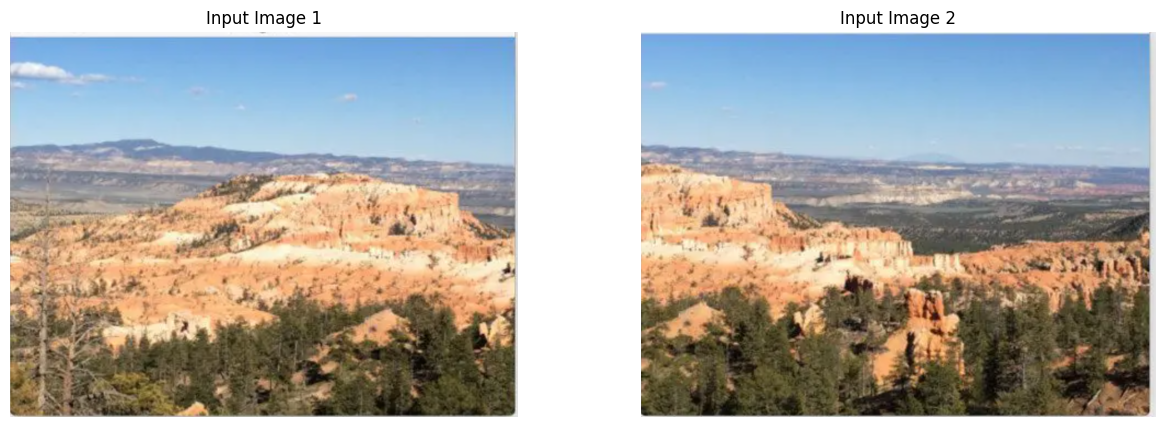

✅ Stitching successful.


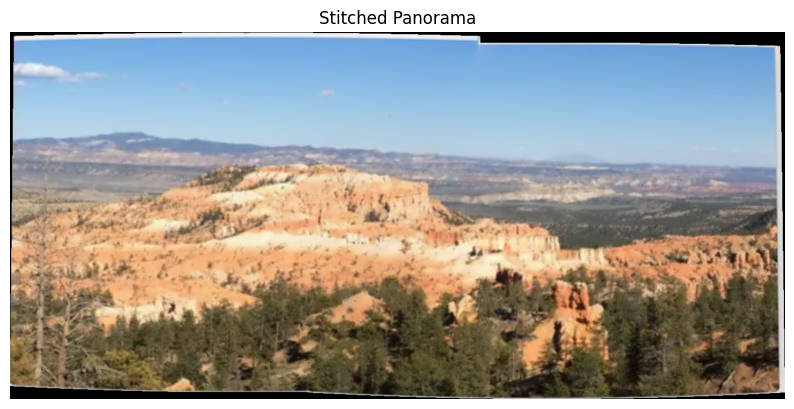

In [ ]:
# Upload 2 or more overlapping images
from google.colab import files
uploaded = files.upload()

# Read uploaded images
images = []
file_names = list(uploaded.keys())
for fname in file_names:
    img = cv2.imread(fname)
    images.append(img)

# Display input images
plt.figure(figsize=(15, 5))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(f"Input Image {i+1}")
    plt.axis('off')
plt.show()

# Stitch images
stitcher = cv2.Stitcher_create()
(status, stitched) = stitcher.stitch(images)

# Show result
if status == cv2.Stitcher_OK:
    print("✅ Stitching successful.")
    plt.figure(figsize=(10, 5))
    plt.imshow(cv2.cvtColor(stitched, cv2.COLOR_BGR2RGB))
    plt.title("Stitched Panorama")
    plt.axis('off')
    plt.show()
else:
    print("❌ Stitching failed. Error code:", status)


Saving q1.jpeg to q1 (2).jpeg
Saving q3.jpeg to q3 (2).jpeg


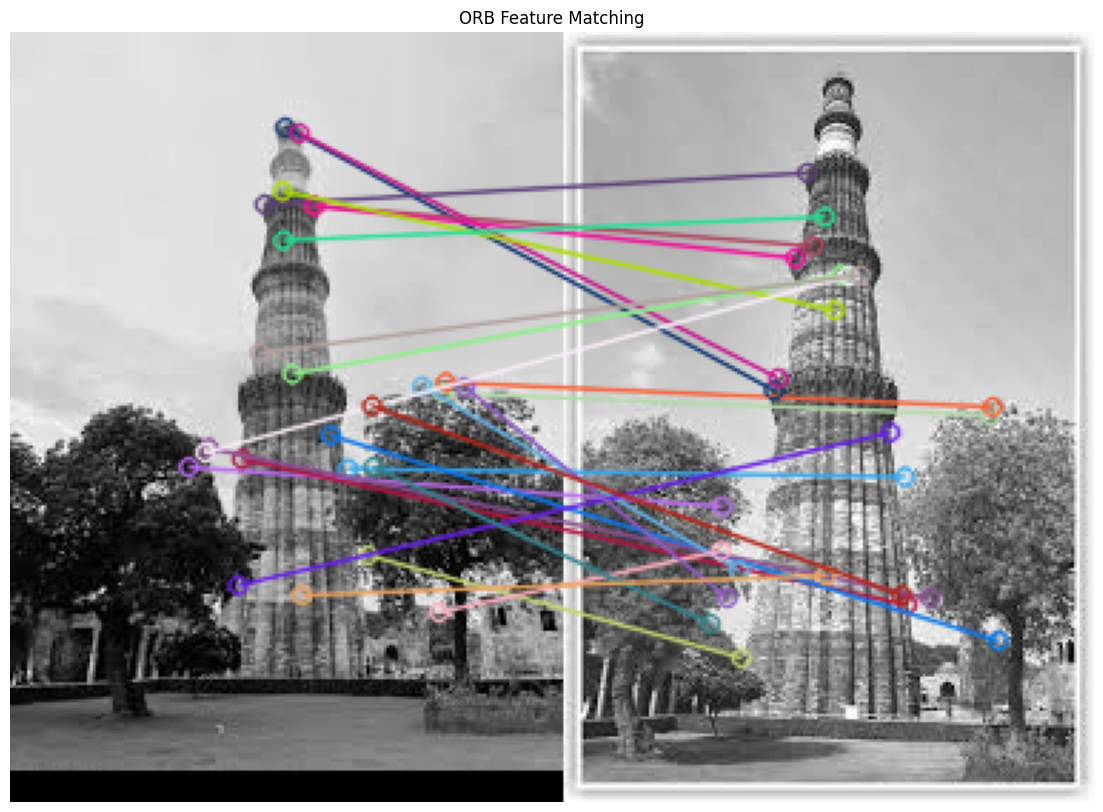

In [ ]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Upload two images with slight view change
uploaded = files.upload()
keys = list(uploaded.keys())

# Load as grayscale for feature detection
img1 = cv2.imread(keys[0], cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(keys[1], cv2.IMREAD_GRAYSCALE)

# Detect ORB keypoints and descriptors
orb = cv2.ORB_create()
kps1, des1 = orb.detectAndCompute(img1, None)
kps2, des2 = orb.detectAndCompute(img2, None)


bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

# Draw top 50 matches
img_matches = cv2.drawMatches(img1, kps1, img2, kps2, matches[:25], None, flags=2)

# Show the matched keypoints
plt.figure(figsize=(20, 10))
plt.imshow(img_matches, cmap='gray')
plt.title('ORB Feature Matching')
plt.axis('off')
plt.show()
